<a href="https://colab.research.google.com/github/rahulchirra/hotel_review_sentiment_analysis/blob/main/Hotel_review_sentiment_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
data = pd.read_csv('/content/drive/MyDrive/Hotel_Reviews.csv', encoding = 'latin-1')

In [29]:
data.head()

,Review,Feedback
0,nice hotel expensive parking got good deal sta...,Pos
1,ok nothing special charge diamond member hilto...,Neg
2,nice rooms not 4* experience hotel monaco seat...,Pos
3,"unique, great stay, wonderful time hotel monac...",Pos
4,"great stay great stay, went seahawk game aweso...",Pos


In [30]:
data.columns

Index(['Review', 'Feedback'], dtype='object')

 Data Preparation, Tokenization, Stopwords Removal and Stemming

In [31]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

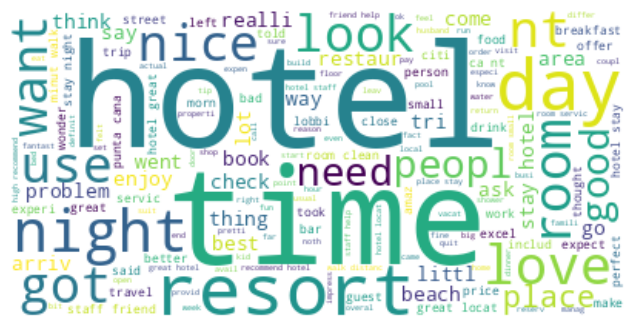

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Step 3: Text Vectorization


In [34]:
x = np.array(data["Review"])
y = np.array(data["Feedback"])

In [35]:
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

Step 4: Text Classification


In [36]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()
model.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [37]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: worst hotel
['Neg']
